In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

eth2012 = pd.read_csv('ObesityEthnicity2012.csv')
eth2013 = pd.read_csv('ObesityEthnicity2013.csv')
eth2014 = pd.read_csv('ObesityEthnicity2014.csv')
eth2015 = pd.read_csv('ObesityEthnicity2015.csv')
eth2016 = pd.read_csv('ObesityEthnicity2016.csv')

eth2012['Year'] = '2012'
eth2013['Year'] = '2013'
eth2014['Year'] = '2014'
eth2015['Year'] = '2015'
eth2016['Year'] = '2016'

all_df = pd.concat([eth2012, eth2013, eth2014, eth2015, eth2016], ignore_index=True)

eth2016.head()

,State,Date,BMI Category,BMI Over 25,Race/Ethnicity (General),Five Level Race/ethnicity,Year
0,AL,1072016,Normal Weight,No,"White, Non-Hispanic","White only, Non-Hispanic",2016
1,AL,1112016,Overweight,Yes,"White, Non-Hispanic","White only, Non-Hispanic",2016
2,AL,1062016,Normal Weight,No,"White, Non-Hispanic","White only, Non-Hispanic",2016
3,AL,1082016,Overweight,Yes,"White, Non-Hispanic","White only, Non-Hispanic",2016
4,AL,1052016,Normal Weight,No,"White, Non-Hispanic","White only, Non-Hispanic",2016


In [2]:
all_df['BMI Category'] = all_df['BMI Category'].replace({"Normal Weight": "Other", "Don't know/Refused/Missing": "Other","Underweight":"Other"})

In [3]:
group_all = all_df.groupby(['Year', 'Race/Ethnicity (General)', 'BMI Category'])['Date'].count()

group_all.head()

Year  Race/Ethnicity (General)        BMI Category
2012  American Indian/Alaskan Native  Obese           2441
                                      Other           2104
                                      Overweight      2331
      Asian                           Obese            889
                                      Other           5643
Name: Date, dtype: int64

In [4]:
group1 = group_all.unstack(level=2)

group1.head()

BMI Category                         Obese  Other  Overweight
Year Race/Ethnicity (General)                                
2012 American Indian/Alaskan Native   2441   2104        2331
     Asian                             889   5643        2749
     Black, Non-Hispanic             15221  10939       12209
     Don't Know/Not Sure/Refused      1357   2879        1841
     Hispanic                         9917  13448       12363

In [5]:
group1["Grand Total"] = group1["Obese"] + group1["Other"] + group1["Overweight"]

group1["Percentage of Obese (by Ethnicity)"] = (group1['Obese'] * 100) / group1['Grand Total']

group1.head()

BMI Category                         Obese  Other  Overweight  Grand Total  \
Year Race/Ethnicity (General)                                                
2012 American Indian/Alaskan Native   2441   2104        2331         6876   
     Asian                             889   5643        2749         9281   
     Black, Non-Hispanic             15221  10939       12209        38369   
     Don't Know/Not Sure/Refused      1357   2879        1841         6077   
     Hispanic                         9917  13448       12363        35728   

BMI Category                         Percentage of Obese (by Ethnicity)  
Year Race/Ethnicity (General)                                            
2012 American Indian/Alaskan Native                           35.500291  
     Asian                                                     9.578709  
     Black, Non-Hispanic                                      39.670046  
     Don't Know/Not Sure/Refused                              22.330097  
     Hispanic                                                 27.756941

In [6]:
group1.reset_index(inplace=True)

group1.head()

BMI Category,Year,Race/Ethnicity (General),Obese,Other,Overweight,Grand Total,Percentage of Obese (by Ethnicity)
0,2012,American Indian/Alaskan Native,2441,2104,2331,6876,35.500291
1,2012,Asian,889,5643,2749,9281,9.578709
2,2012,"Black, Non-Hispanic",15221,10939,12209,38369,39.670046
3,2012,Don't Know/Not Sure/Refused,1357,2879,1841,6077,22.330097
4,2012,Hispanic,9917,13448,12363,35728,27.756941


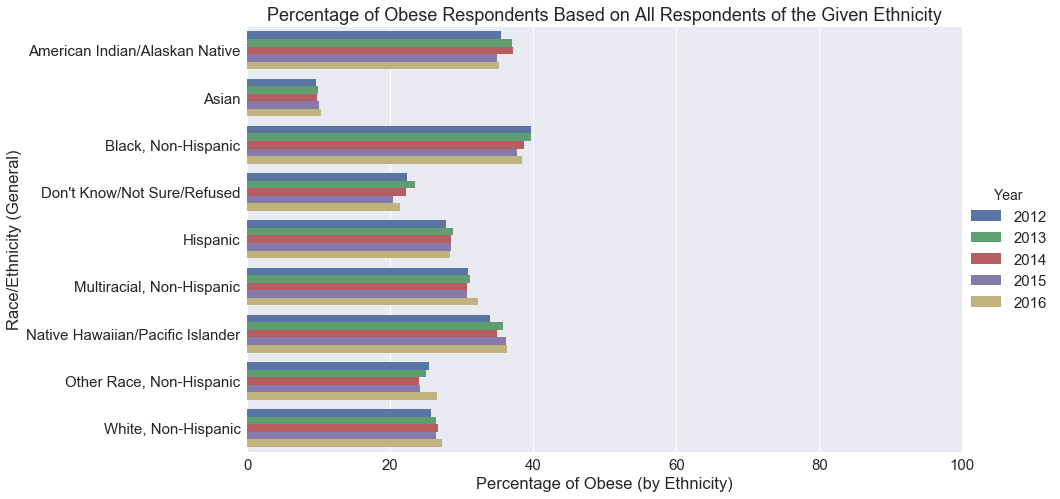

In [9]:
import seaborn as sns

sns.set()

sns.set(font_scale=1.5)
sns.factorplot(x="Percentage of Obese (by Ethnicity)", y='Race/Ethnicity (General)', hue='Year', data=group1, kind='bar', size=7, aspect=2)
plt.title("Percentage of Obese Respondents Based on All Respondents of the Given Ethnicity")
plt.xlim(0, 100, 5)

# plt.savefig('test.png')
plt.show()